In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as nplin
import itertools
from sklearn.linear_model import LinearRegression

from matplotlib.ticker import MultipleLocator,FormatStrFormatter,AutoMinorLocator,ScalarFormatter

In [2]:
np.random.seed(0)

In [3]:
n_size = 4
n_method = 5

label = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)','(m)','(n)',
        '(o)','(p)','(q)','(r)','(s)','(t)','(u)','(v)','(w)','(x)','(y)','(z)']

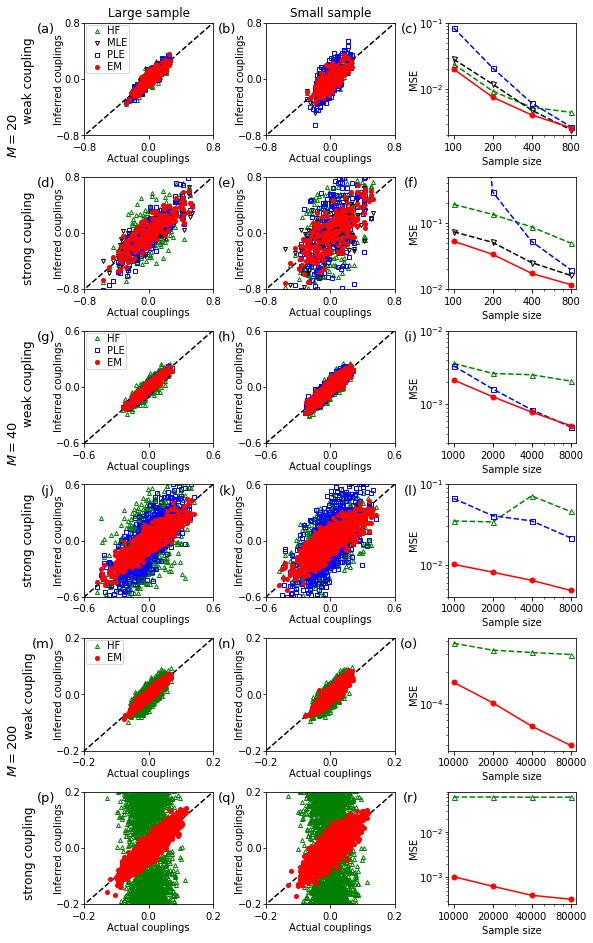

In [15]:
mse = np.zeros((n_size,n_method))

nx,ny = 3,6
nfig = nx*ny
#fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.7))
fig, ax = plt.subplots(ny,nx,figsize=(nx*2.8,ny*2.2))

# m = 20
for i,g in enumerate([0.5,1.0]):
    w = np.loadtxt('m20/w_20_%s_800.dat'%g)
    ax[i,0].plot([-1,1],[-1,1],'k--')
    ax[i,0].plot(w[0],w[1],'g^',marker='^',mfc='none',markersize=4,label='HF')
    ax[i,0].plot(w[0],w[2],'kv',marker='v',mfc='none',markersize=4,label='MLE')
    ax[i,0].plot(w[0],w[3],'bs',marker='s',mfc='none',markersize=4,label='PLE')
    ax[i,0].plot(w[0],w[5],'ro',marker='o',markersize=4,label='EM')

    w = np.loadtxt('m20/w_20_%s_200.dat'%g)
    ax[i,1].plot([-1,1],[-1,1],'k--')
    ax[i,1].plot(w[0],w[1],'g^',marker='^',mfc='none',markersize=4,label='HF')
    ax[i,1].plot(w[0],w[2],'kv',marker='v',mfc='none',markersize=4,label='MLE')
    ax[i,1].plot(w[0],w[3],'bs',marker='s',mfc='none',markersize=4,label='PLE')
    ax[i,1].plot(w[0],w[5],'ro',marker='o',markersize=4,label='EM')

    mse[0,:] = np.loadtxt('m20/mse_20_%s_100.dat'%g)
    mse[1,:] = np.loadtxt('m20/mse_20_%s_200.dat'%g)
    mse[2,:] = np.loadtxt('m20/mse_20_%s_400.dat'%g)
    mse[3,:] = np.loadtxt('m20/mse_20_%s_800.dat'%g)
    
    n_seq = [100,200,400,800]
    ax[i,2].loglog(n_seq,mse[:,0],'g^--',marker='^',mfc='none',markersize=5,label='HF')
    ax[i,2].loglog(n_seq,mse[:,1],'kv--',marker='v',mfc='none',markersize=5,label='MLE')
    ax[i,2].loglog(n_seq,mse[:,2],'bs--',marker='s',mfc='none',markersize=5,label='PLE')
    ax[i,2].loglog(n_seq,mse[:,4],'ro-',marker='o',markersize=5,label='EM')

## m = 40
for j,g in enumerate([0.5,1.0]):
    i = j+2
    w = np.loadtxt('m40/w_40_%s_8000.dat'%g)
    ax[i,0].plot([-1,1],[-1,1],'k--')
    ax[i,0].plot(w[0],w[1],'g^',marker='^',mfc='none',markersize=4,label='HF')
    ax[i,0].plot(w[0],w[3],'bs',marker='s',mfc='none',markersize=4,label='PLE')
    ax[i,0].plot(w[0],w[5],'ro',marker='o',markersize=4,label='EM')

    w = np.loadtxt('m40/w_40_%s_2000.dat'%g)
    ax[i,1].plot([-1,1],[-1,1],'k--')
    ax[i,1].plot(w[0],w[1],'g^',marker='^',mfc='none',markersize=4,label='HF')
    ax[i,1].plot(w[0],w[3],'bs',marker='s',mfc='none',markersize=4,label='PLE')
    ax[i,1].plot(w[0],w[5],'ro',marker='o',markersize=4,label='EM')

    mse[0,:] = np.loadtxt('m40/mse_40_%s_1000.dat'%g)
    mse[1,:] = np.loadtxt('m40/mse_40_%s_2000.dat'%g)
    mse[2,:] = np.loadtxt('m40/mse_40_%s_4000.dat'%g)
    mse[3,:] = np.loadtxt('m40/mse_40_%s_8000.dat'%g)
    
    n_seq = [1000,2000,4000,8000]
    ax[i,2].loglog(n_seq,mse[:,0],'g^--',marker='^',mfc='none',markersize=5,label='HF')
    ax[i,2].loglog(n_seq,mse[:,2],'bs--',marker='s',mfc='none',markersize=5,label='PLE')
    ax[i,2].loglog(n_seq,mse[:,4],'ro-',marker='o',markersize=5,label='EM')
    
## m = 200
nstep = 5
for j,g in enumerate([0.3,0.5]):
    i = j+4
    
    w_true = np.loadtxt('m200/w_m200_g%s_true.txt'%g)
    w_HF = np.loadtxt('m200/w_m200_g%s_80k_HF.dat'%g)
    w_EM = np.loadtxt('m200/w_m200_g%s_80k_EM.dat'%g)
    
    ax[i,0].plot([-1,1],[-1,1],'k--')
    ax[i,0].plot(w_true[::nstep],w_HF[::nstep],'g^',marker='^',mfc='none',markersize=4,label='HF')
    ax[i,0].plot(w_true[::nstep],w_EM[::nstep],'ro',marker='o',markersize=4,label='EM')

    w_HF = np.loadtxt('m200/w_m200_g%s_20k_HF.dat'%g)
    w_EM = np.loadtxt('m200/w_m200_g%s_20k_EM.dat'%g)
    
    ax[i,1].plot([-1,1],[-1,1],'k--')
    ax[i,1].plot(w_true[::nstep],w_HF[::nstep],'g^',marker='^',mfc='none',markersize=4,label='HF')
    ax[i,1].plot(w_true[::nstep],w_EM[::nstep],'ro',marker='o',markersize=4,label='EM')

    mse = np.loadtxt('m200/mse_m200_g%s.dat'%g)

    n_seq = [10000,20000,40000,80000]
    ax[i,2].loglog(n_seq,mse[:,2],'g^--',marker='^',mfc='none',markersize=5,label='HF')
    ax[i,2].loglog(n_seq,mse[:,1],'ro-',marker='o',markersize=5,label='EM')    
        

for j in [0,1]:        
    for i in range(nx-1):        
        ax[j,i].set_xlim([-0.8,0.8])
        ax[j,i].set_ylim([-0.8,0.8])        
        ax[j,i].set_xticks([-0.8,0,0.8])
        ax[j,i].set_yticks([-0.8,0,0.8])
        #ax[j,i].tick_params(axis='x', which='major', pad=1)
        #ax[j,i].tick_params(axis='y', which='major', pad=1)
        
for j in [2,3]:        
    for i in range(nx-1):        
        ax[j,i].set_xlim([-0.6,0.6])
        ax[j,i].set_ylim([-0.6,0.6])        
        ax[j,i].set_xticks([-0.6,0,0.6])
        ax[j,i].set_yticks([-0.6,0,0.6])
                
for j in [4,5]:        
    for i in range(nx-1):
        ax[j,i].set_xlim([-0.2,0.2])
        ax[j,i].set_ylim([-0.2,0.2])        
        ax[j,i].set_xticks([-0.2,0,0.2])
        ax[j,i].set_yticks([-0.2,0,0.2])
        
        #ax[j,i].set_xlim([-0.4,0.4])
        #ax[j,i].set_ylim([-0.4,0.4])        
        #ax[j,i].set_xticks([-0.4,0,0.4])
        #ax[j,i].set_yticks([-0.4,0,0.4])
        
#        ax[j,i].set_xlim([-0.3,0.3])
#        ax[j,i].set_ylim([-0.3,0.3])        
#        ax[j,i].set_xticks([-0.3,0,0.3])
#        ax[j,i].set_yticks([-0.3,0,0.3])
        
        
for j in range(ny):
    ax[j,2].set_xlabel('Sample size')
    ax[j,2].set_ylabel('MSE',labelpad=0)
   
    ax[j,2].xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax[j,2].xaxis.set_minor_formatter(FormatStrFormatter(''))
    
    #ax[j,2].yaxis.set_major_formatter(FormatStrFormatter('%d'))
    #ax[j,2].yaxis.set_minor_formatter(FormatStrFormatter(''))

ax[0,2].set_xticks([100,200,400,800])
ax[1,2].set_xticks([100,200,400,800])
ax[2,2].set_xticks([1000,2000,4000,8000])
ax[3,2].set_xticks([1000,2000,4000,8000])
ax[4,2].set_xticks([10000,20000,40000,80000])
ax[5,2].set_xticks([10000,20000,40000,80000])

#ax[4,2].set_xticks([5000,10000,20000,40000])
#ax[5,2].set_xticks([5000,10000,20000,40000])

ax[0,2].set_ylim([0.002,0.1])
ax[1,2].set_ylim([0.01,0.5])
ax[2,2].set_ylim([0.0003,0.01])
ax[2,2].set_yticks([0.001,0.01])
#ax[2,2].set_yticks([$10^-3$,$10^-2$])
ax[3,2].set_ylim([0.004,0.1])
#ax[5,2].set_ylim([0.0002,0.1])

#ax[4,2].set_ylim([0.00001,0.0005])
#ax[4,2].set_yticks([0.001,0.01])

for j in range(ny):       
    for i in range(nx):        
        ax[j,i].tick_params(axis='x', which='major', pad=4)
        ax[j,i].tick_params(axis='y', which='major', pad=1)

for j in range(ny):
    for i in range(nx-1):
        ax[j,i].set_xlabel('Actual couplings',labelpad=1)
        ax[j,i].set_ylabel('Inferred couplings',labelpad=-8)        
        
"""
ax[0,2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1,2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[2,2].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[3,2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[4,2].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[5,2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
"""

xlabel = np.full(nfig,-0.23)
ylabel = np.full(nfig,1.)
k = 0
for i in range(ny):
    for j in range(nx):        
        ax[i,j].text(xlabel[k],ylabel[k],label[k],transform=ax[i,j].transAxes,va='top',ha='right',fontsize=13)
        k += 1

ax[0,0].set_title('Large sample')
ax[0,1].set_title('Small sample')

ax[0,0].text(-0.5,0,'$M=20$',transform=ax[0,0].transAxes,va='center',ha='right',fontsize=13,rotation=90)
ax[2,0].text(-0.5,0,'$M=40$',transform=ax[2,0].transAxes,va='center',ha='right',fontsize=13,rotation=90)
ax[4,0].text(-0.5,0,'$M=200$',transform=ax[4,0].transAxes,va='center',ha='right',fontsize=13,rotation=90)

#ax[0,0].text(-1.7,-1.1,'$M=20$',va='center',ha='right',fontsize=13,rotation=90)
#ax[2,0].text(-1.5,0,'$M=40$',va='center',ha='right',fontsize=13,rotation=90)
#ax[4,0].text(-1.5,0,'$M=100$',va='center',ha='right',fontsize=13,rotation=90)

ax[0,0].text(-1.42,0.6,'weak coupling',va='top',ha='right',fontsize=12,rotation=90)
ax[1,0].text(-1.42,0.6,'strong coupling',va='top',ha='right',fontsize=12,rotation=90)

ax[2,0].text(-1.06,0.5,'weak coupling',va='top',ha='right',fontsize=12,rotation=90)
ax[3,0].text(-1.06,0.5,'strong coupling',va='top',ha='right',fontsize=12,rotation=90)

#ax[4,0].text(-0.72,0.3,'weak coupling',va='top',ha='right',fontsize=12,rotation=90)
#ax[5,0].text(-0.72,0.3,'strong coupling',va='top',ha='right',fontsize=12,rotation=90)

ax[4,0].text(-0.35,0.15,'weak coupling',va='top',ha='right',fontsize=12,rotation=90)
ax[5,0].text(-0.35,0.15,'strong coupling',va='top',ha='right',fontsize=12,rotation=90)

for j in [0,2,4]:
    ax[j,0].legend(labelspacing=0.2,loc='upper left',handletextpad=0,borderaxespad=0.2,borderpad=0.1)

plt.tight_layout(h_pad=0.4, w_pad=-0.5)
plt.savefig('fig2_large_font_m200.pdf', format='pdf', dpi=100)